In [1]:
import pandas as pd
import numpy as np
import os
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib.patches as mpatches
%matplotlib inline


C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<span style="font-family: verdana; color: green; font-size: 20px;font-weight: bold;">Step one: Processing the emissions summary for visualization</span>

In [2]:
summary1 = pd.read_csv('../../../results/Inventory.csv')
summary = summary1.drop(summary1.columns[0], axis=1)
summary.index = summary.index + 1 #reorder the index to start as 1 instead of 0
summary = summary.drop(summary.index[-1])
summary

# Assuming 'condition' is the condition for selecting rows
condition = (summary['Sector'] == 'Electricity Consumption')  # Replace with your condition
# Change the values in 'Column_Name' for the selected rows
summary['Subsector'][condition] = summary['Subsector'][condition] +' '+ 'electricity'
# Assuming 'condition' is the condition for selecting rows
condition = (summary['Sector'] == 'Stationary Combustion')  # Replace with your condition
# Change the values in 'Column_Name' for the selected rows
summary['Subsector'][condition] = summary['Subsector'][condition] +' '+ 'buildings'

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_12764\3749900444.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  summary['Subsector'][condition] = summary['Subsector'][condition] +' '+ 'electricity'
C:\Users\peiyaozhao\AppData\Local\Te

In [5]:
mobile = pd.read_csv('../../../visualization data/mobile-emissions.csv')
mobile = mobile['GHG Emissions(MMTCO2e)']
electric = pd.read_csv('../../../visualization data/2021-Electricity-consumption-emissions.csv')
electric = electric['Total Emissions (MMTCO2e)']
residential_breakdowm = pd.read_csv('../../../visualization data/residential-emissions-breakdown-fuel.csv')
residential_oil = residential_breakdowm.iloc[2,1:][::-1].reset_index(drop=True).astype(float)
residential_propane = residential_breakdowm.iloc[1,1:][::-1].reset_index(drop=True).astype(float)
residential_natural = residential_breakdowm.iloc[0,1:][::-1].reset_index(drop=True).astype(float)
residential = residential_oil+residential_propane+residential_natural
commercial = summary.loc[28:30,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
industrial = summary.loc[31:33,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
stationary = residential_oil+residential_propane+residential_natural+commercial+industrial
solid_waste = summary.loc[19:21,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
agriculture = pd.read_csv('../../../visualization data/agriculture-emissions.csv')
agriculture = agriculture['GHG Emissions (MMTCO2e)']
wastewater = summary.loc[43:45,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
forest = pd.read_csv('../../../visualization data/land-cover-emissions.csv')
forest = forest['Total carbon sequestration (MMTCO2e)']*(-1)

FileNotFoundError: [Errno 2] No such file or directory: '../../../visualization data/2021-Electricity-consumption-emissions.csv'

In [4]:
forest 

NameError: name 'forest' is not defined

In [5]:
# Creating a sample DataFrame
data = {
    'MSA': ['New Haven Region', 'Hartford Region', 'Bridgeport Region'],
    'Mobile combustion': mobile,
    'Electricity consumption': electric,
    'Stationary combustion': stationary,
    'Solid waste': solid_waste,
    'Wastewater treatment': wastewater,
    'Agriculture': agriculture,
    'Forestry': forest,
}

df = pd.DataFrame(data)

# Display the created DataFrame

df.set_index('MSA', inplace=True)

In [6]:
df_new =df.copy()

In [7]:
df_new = df_new.iloc[:, :-1]

In [8]:
df_new


,Mobile combustion,Electricity consumption,Stationary combustion,Solid waste,Wastewater treatment,Agriculture
MSA,,,,,,
New Haven Region,2.875389,1.314940,2.656305,0.000000,0.092857,0.029241
Hartford Region,4.355344,1.790219,4.012636,0.295523,0.232347,0.170435
Bridgeport Region,2.968949,1.719647,2.329686,0.296673,0.079003,0.014407


In [9]:
ct=[14.77,3.04, 14.1,1.85,0.39,0.35] #divided by CT population

ct_df = pd.DataFrame([ct], columns=df_new.columns)

# Add the new row to the DataFrame
df_new_1 = pd.concat([df_new, ct_df], ignore_index=True)

df_new_1['Total']=df_new_1.iloc[:, :].sum(axis=1)
df_new_1

,Mobile combustion,Electricity consumption,Stationary combustion,Solid waste,Wastewater treatment,Agriculture,Total
0,2.875389,1.314940,2.656305,0.000000,0.092857,0.029241,6.968733
1,4.355344,1.790219,4.012636,0.295523,0.232347,0.170435,10.856504
2,2.968949,1.719647,2.329686,0.296673,0.079003,0.014407,7.408364
3,14.770000,3.040000,14.100000,1.850000,0.390000,0.350000,34.500000


In [10]:
# Change the row index
df_new_1 = df_new_1.rename(index={0: 'New Haven Region', 1: 'Hartford Region', 2: 'Bridgeport Region', 3: 'Connecticut'})
all_ct = df_new_1
df_new_1 = df_new_1.drop(df_new_1.index[-1])
pre = df_new_1
pre

,Mobile combustion,Electricity consumption,Stationary combustion,Solid waste,Wastewater treatment,Agriculture,Total
New Haven Region,2.875389,1.314940,2.656305,0.000000,0.092857,0.029241,6.968733
Hartford Region,4.355344,1.790219,4.012636,0.295523,0.232347,0.170435,10.856504
Bridgeport Region,2.968949,1.719647,2.329686,0.296673,0.079003,0.014407,7.408364


In [11]:
all_ct


# New column data
new_column_data = [-0.63, -1.98, -0.74, -6.16]  # Example data for the new column

all_ct['Total']=new_column_data 
all_ct.rename(columns={'Total': 'Forestry'}, inplace=True)

In [12]:
all_ct['Total']=all_ct.iloc[:, :6].sum(axis=1)
all_ct

,Mobile combustion,Electricity consumption,Stationary combustion,Solid waste,Wastewater treatment,Agriculture,Forestry,Total
New Haven Region,2.875389,1.314940,2.656305,0.000000,0.092857,0.029241,-0.63,6.968733
Hartford Region,4.355344,1.790219,4.012636,0.295523,0.232347,0.170435,-1.98,10.856504
Bridgeport Region,2.968949,1.719647,2.329686,0.296673,0.079003,0.014407,-0.74,7.408364
Connecticut,14.770000,3.040000,14.100000,1.850000,0.390000,0.350000,-6.16,34.500000


In [13]:
# Calculate ratios
ratios = all_ct.div(all_ct['Total'], axis=0)

# Concatenate original DataFrame with ratio DataFrame
result_df = pd.concat([all_ct, ratios.drop(columns='Total')*100], axis=1)

result_df

,Mobile combustion,Electricity consumption,Stationary combustion,Solid waste,Wastewater treatment,Agriculture,Forestry,Total,Mobile combustion,Electricity consumption,Stationary combustion,Solid waste,Wastewater treatment,Agriculture,Forestry
New Haven Region,2.875389,1.314940,2.656305,0.000000,0.092857,0.029241,-0.63,6.968733,41.261294,18.869146,38.117473,0.000000,1.332482,0.419605,-9.040381
Hartford Region,4.355344,1.790219,4.012636,0.295523,0.232347,0.170435,-1.98,10.856504,40.117372,16.489828,36.960663,2.722083,2.140164,1.569890,-18.237915
Bridgeport Region,2.968949,1.719647,2.329686,0.296673,0.079003,0.014407,-0.74,7.408364,40.075634,23.212239,31.446696,4.004565,1.066397,0.194470,-9.988710
Connecticut,14.770000,3.040000,14.100000,1.850000,0.390000,0.350000,-6.16,34.500000,42.811594,8.811594,40.869565,5.362319,1.130435,1.014493,-17.855072


In [14]:
all_ct['Mobile']=all_ct['Mobile combustion']/all_ct['Total']*100
all_ct['elec']=all_ct['Electricity consumption']/all_ct['Total']*100
all_ct['station']=all_ct['Stationary combustion']/all_ct['Total']*100
all_ct['solid']=all_ct['Solid waste']/all_ct['Total']*100
all_ct['waste']=all_ct['Wastewater treatment']/all_ct['Total']*100
all_ct['agri']=all_ct['Agriculture']/all_ct['Total']*100
all_ct


,Mobile combustion,Electricity consumption,Stationary combustion,Solid waste,Wastewater treatment,Agriculture,Forestry,Total,Mobile,elec,station,solid,waste,agri
New Haven Region,2.875389,1.314940,2.656305,0.000000,0.092857,0.029241,-0.63,6.968733,41.261294,18.869146,38.117473,0.000000,1.332482,0.419605
Hartford Region,4.355344,1.790219,4.012636,0.295523,0.232347,0.170435,-1.98,10.856504,40.117372,16.489828,36.960663,2.722083,2.140164,1.569890
Bridgeport Region,2.968949,1.719647,2.329686,0.296673,0.079003,0.014407,-0.74,7.408364,40.075634,23.212239,31.446696,4.004565,1.066397,0.194470
Connecticut,14.770000,3.040000,14.100000,1.850000,0.390000,0.350000,-6.16,34.500000,42.811594,8.811594,40.869565,5.362319,1.130435,1.014493


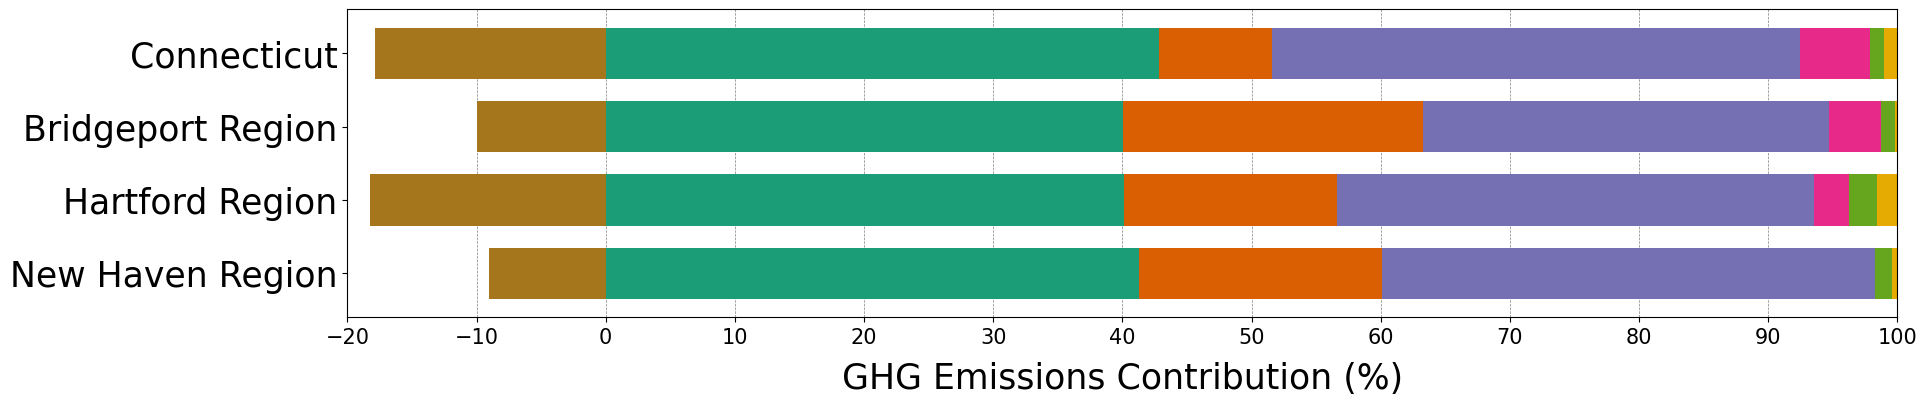

In [15]:
# Color settings
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d']

# Plot
ax = result_df.iloc[:, 8:].plot(kind='barh', stacked=True, figsize=(20, 4), width=0.7, color=colors)

# Customize plot
ax.set_xlabel('GHG Emissions Contribution (%)', fontsize=25, labelpad=10)
ax.set_ylabel('')

# Explicitly remove legend
ax.get_legend().remove()

ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_xticks(range(-20, 110, 10))
ax.set_xlim(-20, 100)  # Set x-axis limits
ax.tick_params(axis='y', labelsize=25)

# Draw vertical grid lines manually
for x in ax.get_xticks():
    ax.axvline(x, color='gray', linestyle='--', linewidth=0.5, zorder=0)

# Save the main plot without the legend
plt.savefig('../../../figures/Report-images/emissions-contribution.jpg', dpi=600, bbox_inches='tight')

In [16]:
result_df.iloc[:, 8:]

,Mobile combustion,Electricity consumption,Stationary combustion,Solid waste,Wastewater treatment,Agriculture,Forestry
New Haven Region,41.261294,18.869146,38.117473,0.000000,1.332482,0.419605,-9.040381
Hartford Region,40.117372,16.489828,36.960663,2.722083,2.140164,1.569890,-18.237915
Bridgeport Region,40.075634,23.212239,31.446696,4.004565,1.066397,0.194470,-9.988710
Connecticut,42.811594,8.811594,40.869565,5.362319,1.130435,1.014493,-17.855072


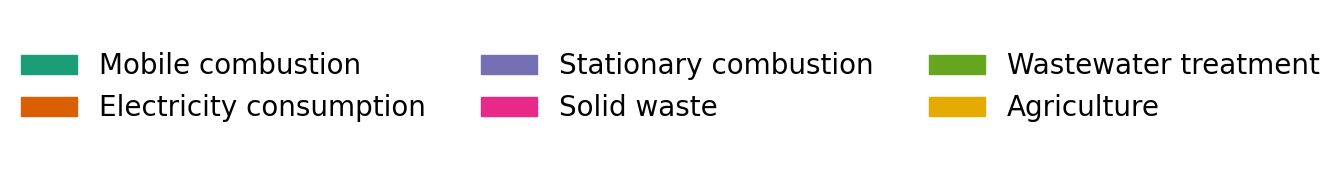

In [17]:
# Define colors and labels
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d']
labels = result_df.columns[8:14]

# Create a dummy plot
plt.figure(figsize=(10, 2))  # Set a small figure size
plt.axis('off')  # Turn off axis

# Create legend handles and labels
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]

# Plot legend with 3 columns
plt.legend(handles=legend_patches, loc='center', fontsize=20, frameon=False, ncol=3)


# Save the legend as a JPEG image
plt.savefig('../../../figures/Report-images/emissions-percentage-legend-2.jpeg', format='jpeg', dpi=600, bbox_inches='tight')

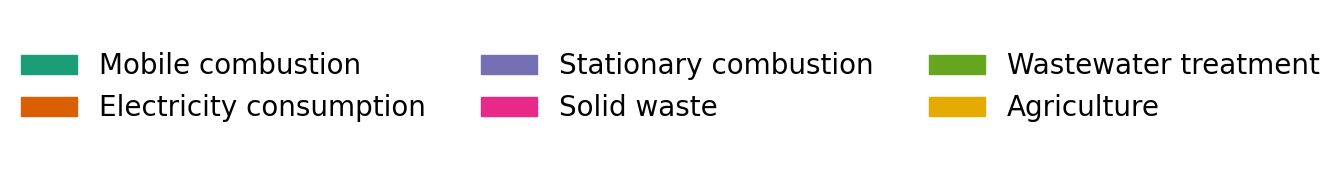

In [174]:
# Define colors and labels
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
labels = result_df.columns[8:]

# Create a dummy plot
plt.figure(figsize=(10, 2))  # Set a small figure size
plt.axis('off')  # Turn off axis

# Create legend handles and labels
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]

# Plot legend with 3 columns
plt.legend(handles=legend_patches, loc='center', fontsize=20, frameon=False, ncol=3)


# Save the legend as a JPEG image
plt.savefig('../../../figures/Report-images/emissions-percentage-legend.jpeg', format='jpeg', dpi=600, bbox_inches='tight')

In [18]:
pre['mobile']=pre['Mobile combustion']/pre['Total']*100
pre['elec']=pre['Electricity consumption']/pre['Total']*100
pre['station']=pre['Stationary combustion']/pre['Total']*100
pre['solid']=pre['Solid waste']/pre['Total']*100
pre['waste']=pre['Wastewater treatment']/pre['Total']*100
pre['agri']=pre['Agriculture']/pre['Total']*100


# New column data
new_column_data = [-0.63, -1.98, -0.74]  # Example data for the new column

# Insert the new column into the 6th position
pre.insert(6, 'Forestry', new_column_data)

pre

,Mobile combustion,Electricity consumption,Stationary combustion,Solid waste,Wastewater treatment,Agriculture,Forestry,Total,mobile,elec,station,solid,waste,agri
New Haven Region,2.875389,1.314940,2.656305,0.000000,0.092857,0.029241,-0.63,6.968733,41.261294,18.869146,38.117473,0.000000,1.332482,0.419605
Hartford Region,4.355344,1.790219,4.012636,0.295523,0.232347,0.170435,-1.98,10.856504,40.117372,16.489828,36.960663,2.722083,2.140164,1.569890
Bridgeport Region,2.968949,1.719647,2.329686,0.296673,0.079003,0.014407,-0.74,7.408364,40.075634,23.212239,31.446696,4.004565,1.066397,0.194470


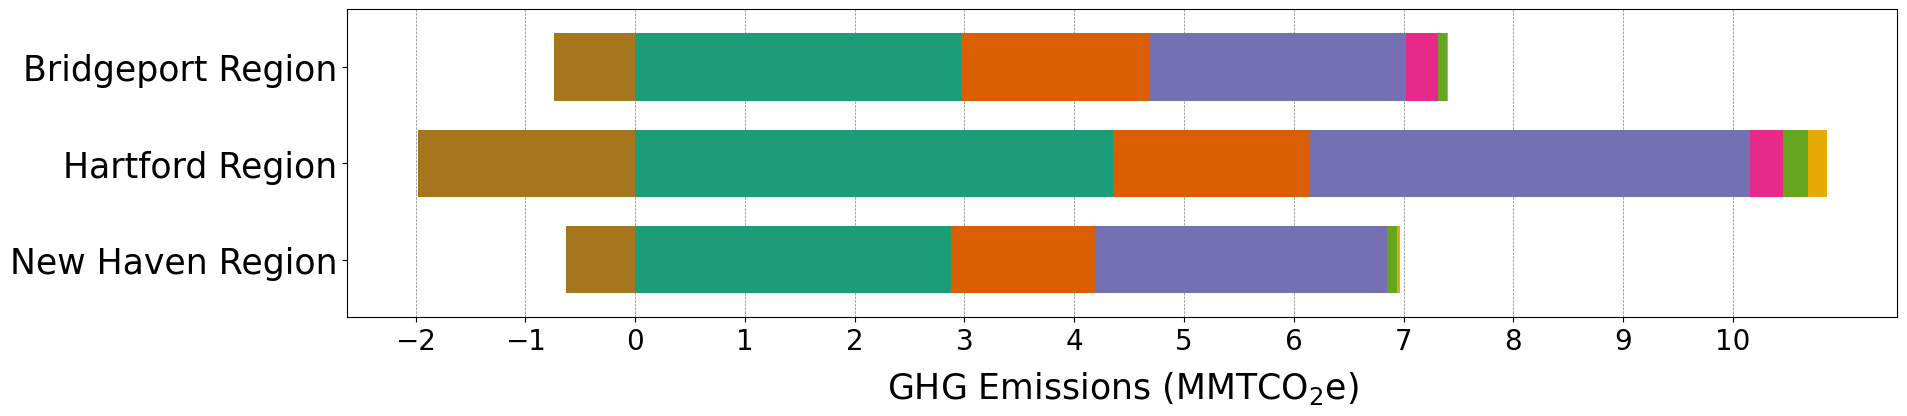

In [19]:
# Color settings
#colors = ['#ffff33', '#ff7f00', '#984ea3', '#4daf4a', '#377eb8', '#e41a1c']
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d']


# Plot
ax =  pre.iloc[:,:-7].plot(kind='barh', stacked=True, figsize=(20, 4), width=0.7, color=colors)

# Customize plot
ax.set_xlabel('GHG Emissions (MMTCO$_2$e)', fontsize=25, labelpad=10)
ax.set_ylabel('')
# Explicitly remove legend
ax.get_legend().remove()
ax.tick_params(axis='both', which='both', labelsize=20)
ax.set_xticks(range(-2, 11, 1))
ax.tick_params(axis='y', labelsize=25)

# Draw vertical grid lines manually
for x in ax.get_xticks():
    ax.axvline(x, color='gray', linestyle='--', linewidth=0.5, zorder=0)
    

# Show the plot
plt.savefig('../../../figures/Report-images/total-emissions.jpg', format='jpg', dpi=600, bbox_inches='tight')

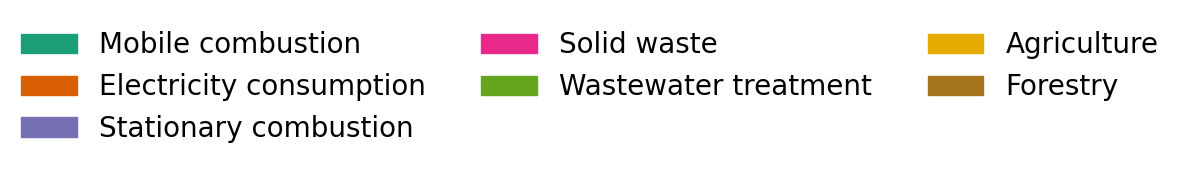

In [20]:
# Define colors and labels
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d']
labels = pre.columns[:8]

# Create a dummy plot
plt.figure(figsize=(10, 2))  # Set a small figure size
plt.axis('off')  # Turn off axis

# Create legend handles and labels
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]

# Plot legend with 3 columns
plt.legend(handles=legend_patches, loc='center', fontsize=20, frameon=False, ncol=3)


# Save the legend as a JPEG image
plt.savefig('../../../figures/Report-images/emissions-percentage-legend.jpeg', format='jpeg', dpi=600, bbox_inches='tight')

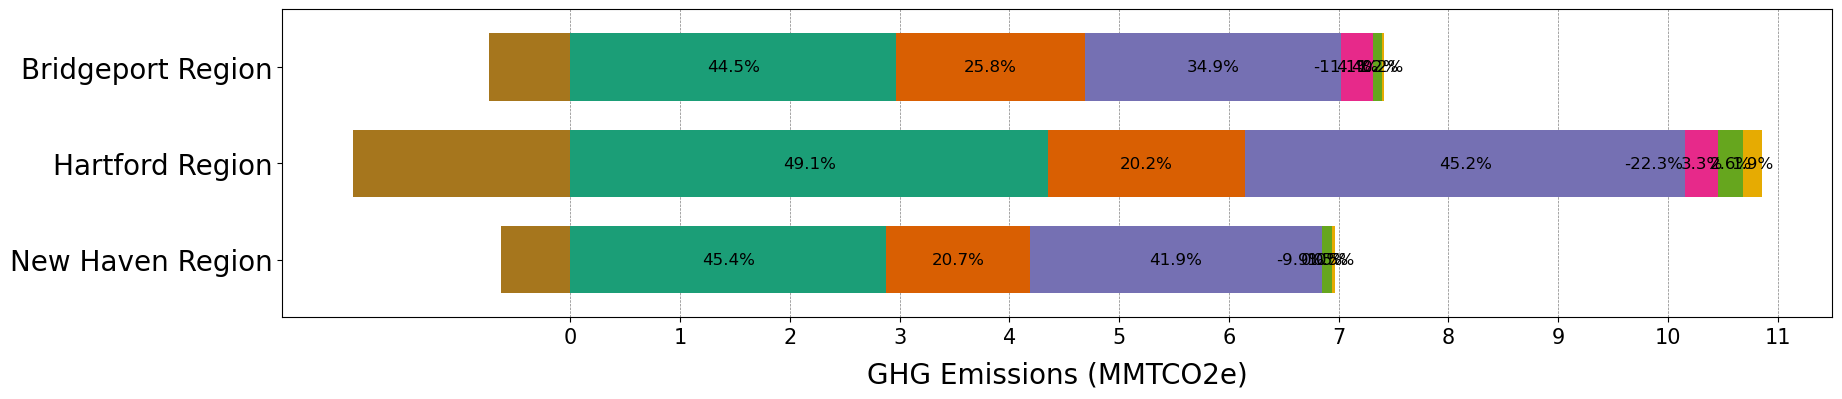

In [21]:
import matplotlib.pyplot as plt

# Define your colors
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d']

# Plot
ax = pre.iloc[:,:-7].plot(kind='barh', stacked=True, figsize=(20, 4), width=0.7, color=colors)

# Customize plot
ax.set_xlabel('GHG Emissions (MMTCO2e)', fontsize=20, labelpad=10)
ax.set_ylabel('')
# Explicitly remove legend
ax.get_legend().remove()
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_xticks(range(0, 12, 1))
ax.tick_params(axis='y', labelsize=20)

# Draw vertical grid lines manually
for x in ax.get_xticks():
    ax.axvline(x, color='gray', linestyle='--', linewidth=0.5, zorder=0)

# Annotate the percentage of each stacked bar
for i in range(pre.shape[0]):  # Iterate over each bar (row in your DataFrame)
    total = pre.iloc[i, :-7].sum()  # Sum of the row values
    cumulative = 0
    for j in range(pre.shape[1] - 7):  # Iterate over each segment in the bar
        value = pre.iloc[i, j]
        cumulative += value
        percentage = (value / total) * 100
        #if value > 0:  # Annotate only if there is a non-zero value
        ax.text(cumulative - value/2, i, f'{percentage:.1f}%', ha='center', va='center', fontsize=12, color='black')

# Show the plot



<span style="font-family: verdana; color: green; font-size: 20px;font-weight: bold;">Step two: Data visualization - sector emissions</span>

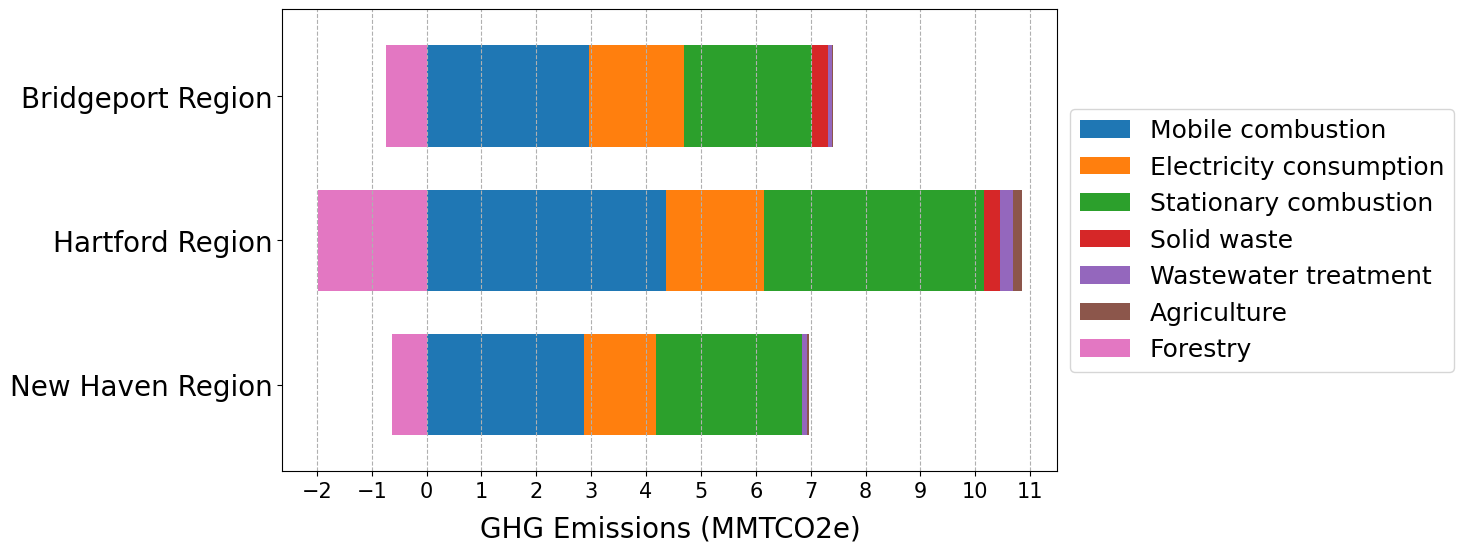

In [22]:
# Plot the DataFrame with x and y axes flipped
ax = df.plot(kind='barh', stacked=True, figsize=(10, 6),width =0.7)
ax.set_xlabel('GHG Emissions (MMTCO2e)', fontsize=20,labelpad=10)
# Add grid
ax.grid(axis='x', linestyle='--', alpha=1)
# Remove y-axis label
ax.set_ylabel('')
# Set the legend outside of the graph
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
# Set font size for labels and ticks
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_xticks(range(-2, int(df.max().max()) + 8, 1))  # Adjust the interval (5 in this case)
ax.tick_params(axis='y', labelsize=20)

# Show the plot
plt.savefig('../../../figures/Report-images/emissions-summary.png', dpi=600, bbox_inches='tight')

In [23]:
df['Total']=df.sum(axis=1)
df

,Mobile combustion,Electricity consumption,Stationary combustion,Solid waste,Wastewater treatment,Agriculture,Forestry,Total
MSA,,,,,,,,
New Haven Region,2.875389,1.314940,2.656305,0.000000,0.092857,0.029241,-0.627891,6.340842
Hartford Region,4.355344,1.790219,4.012636,0.295523,0.232347,0.170435,-1.983747,8.872757
Bridgeport Region,2.968949,1.719647,2.329686,0.296673,0.079003,0.014407,-0.737232,6.671133


In [24]:
#plot the ratio
mobile_ratio = df['Mobile combustion']/df['Total']
#resi = df['Residential']/df['Total']
fore = df['Forestry']/df['Total']
elec = df['Electricity consumption']/df['Total']

In [25]:
#emissions per capita
mobile = pd.read_csv('../../../visualization data/Mobile-combustion-emissions.csv')
mobile = mobile['emissions per capita (MTCO2e)']
electric = pd.read_csv('../../../visualization data/2021-Electricity-consumption-emissions.csv')
electric =electric['Emissions per capita (MTCO2e)']
residential = summary.loc[25:27,['Emissions per capita (MTCO2e)']]['Emissions per capita (MTCO2e)'].reset_index(drop=True).astype(float)
commercial = summary.loc[28:30,['Emissions per capita (MTCO2e)']]['Emissions per capita (MTCO2e)'].reset_index(drop=True).astype(float)
industrial = summary.loc[31:33,['Emissions per capita (MTCO2e)']]['Emissions per capita (MTCO2e)'].reset_index(drop=True).astype(float)
stationary = residential+commercial+industrial
solid_waste = summary.loc[19:21,['Emissions per capita (MTCO2e)']]['Emissions per capita (MTCO2e)'].reset_index(drop=True).astype(float)
agriculture = pd.read_csv('../../../visualization data/agriculture-emissions.csv')
agriculture['emissions per capita (MTCO2e)']=agriculture['GHG Emissions (MMTCO2e)']/[862127,1213123,947328]*1000000
agriculture=agriculture['emissions per capita (MTCO2e)']
wastewater = summary.loc[43:45,['Emissions per capita (MTCO2e)']]['Emissions per capita (MTCO2e)'].reset_index(drop=True).astype(float)
forest = pd.read_csv('../../../visualization data/land-cover-emissions.csv')
forest = forest['Total carbon sequestration (MMTCO2e)']*(-1)/[862127,1213123,947328]*1000000

# Creating a sample DataFrame
data1 = {
    'MSA': ['New Haven Region', 'Hartford Region', 'Bridgeport Region'],
    'Mobile': mobile,
    'Electric': electric,
    'Stationary': stationary,
    'Solid waste': solid_waste,
    'Wastewater treatment': wastewater,
    'Agriculture': agriculture,
    'Forestry': forest,
}


df1 = pd.DataFrame(data1)
df1['Total']=df1.iloc[:, 1:].sum(axis=1)
df1

,MSA,Mobile,Electric,Stationary,Solid waste,Wastewater treatment,Agriculture,Forestry,Total
0,New Haven Region,3.325107,1.520600,3.104128,0.000000,0.107380,0.033917,-0.728305,7.362828
1,Hartford Region,3.515527,1.475466,3.258271,0.238539,0.187545,0.140493,-1.635240,7.180602
2,Bridgeport Region,3.010054,1.797955,2.394380,0.300780,0.080096,0.015208,-0.778222,6.820252


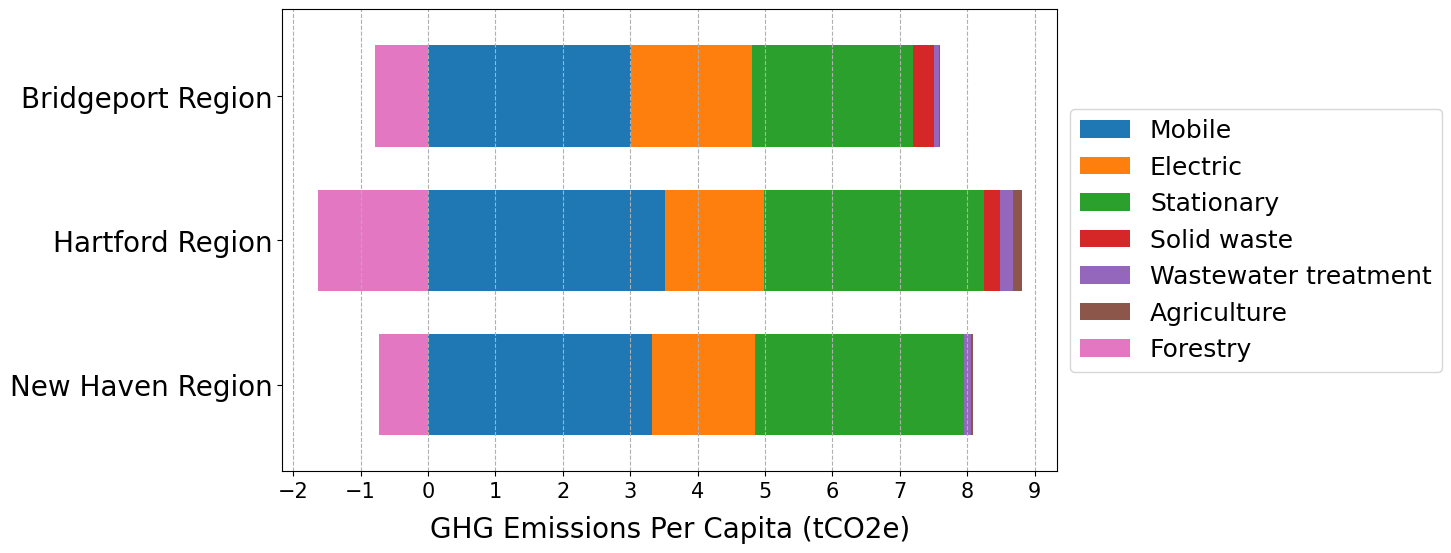

In [26]:
df1.set_index('MSA', inplace=True)
ax = df1.iloc[:,:-1].plot(kind='barh', stacked=True, figsize=(10, 6),width =0.7)
ax.set_xlabel('GHG Emissions Per Capita (tCO2e)', fontsize=20, labelpad=10)
ax.grid(axis='x', linestyle='--', alpha=1)

# Remove y-axis label
ax.set_ylabel('')

# Set the legend outside of the graph
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
# Set font size for labels and ticks
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_xticks(range(-2, int(df.max().max()) + 2, 1))  # Adjust the interval (5 in this case)
ax.tick_params(axis='y', labelsize=20)

# Show the plot
plt.savefig('../../../figures/Report-images/emissions-per-capita.png', dpi=600, bbox_inches='tight')

In [27]:
# Creating a sample DataFrame
data1 = {
    'MSA': ['New Haven Region', 'Hartford Region', 'Bridgeport Region'],
    'Mobile combustion': mobile,
    'Electricity consumption': electric,
    'Stationary combustion': stationary,
    'Solid waste': solid_waste,
    'Wastewater treatment': wastewater,
    'Agriculture': agriculture,
    'Forestry': forest
}


df1 = pd.DataFrame(data1)
ct=['Connecticut',14.77/3.605330,3.04/3.605330, 14.1/3.605330,1.85/3.605330,0.39/3.605330,0.35/3.605330,-6.16] #divided by CT population

ct_df = pd.DataFrame([ct], columns=df1.columns)

# Add the new row to the DataFrame
df = pd.concat([df1, ct_df], ignore_index=True)

df['Total']=df.iloc[:, 1:].sum(axis=1)
df
# Set index
df.set_index('MSA', inplace=True)

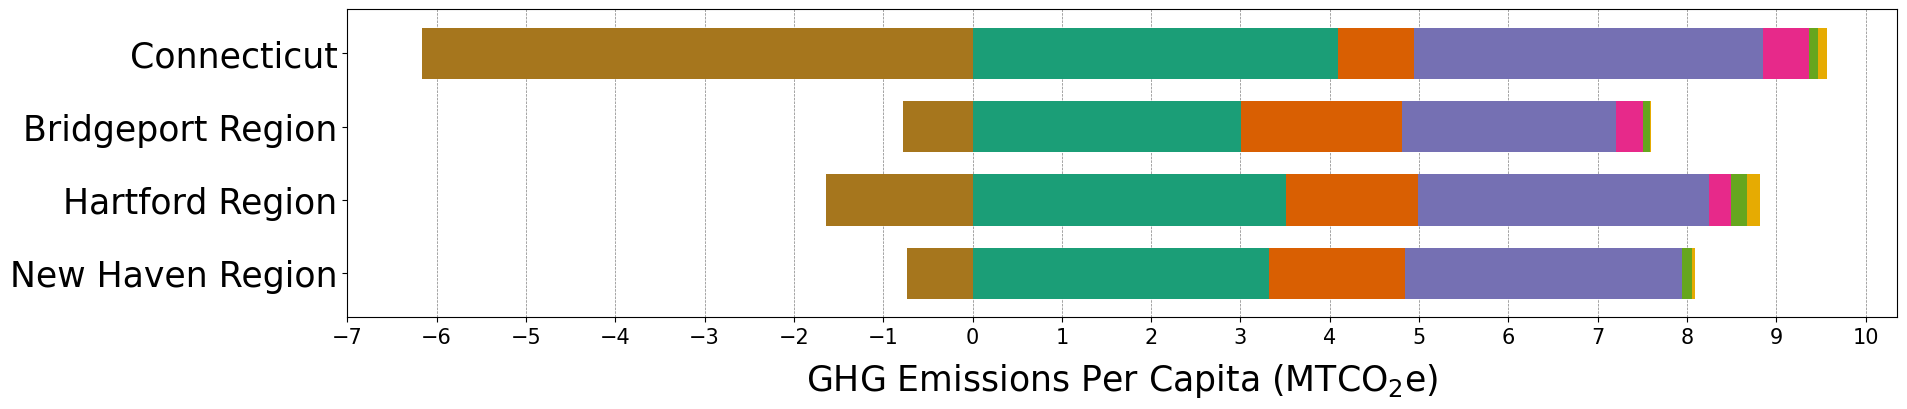

In [28]:
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02','#a6761d']

# Plot
ax = df.iloc[:,:-1].plot(kind='barh', stacked=True, figsize=(20, 4), width=0.7, color=colors)

# Customize plot
ax.set_xlabel('GHG Emissions Per Capita (MTCO$_2$e)', fontsize=25, labelpad=10)
ax.set_ylabel('')

# Explicitly remove legend
ax.get_legend().remove()
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_xticks(range(-7, int(df.max().max()) + 4, 1))
ax.tick_params(axis='y', labelsize=25)

# Draw vertical grid lines manually
for x in ax.get_xticks():
    ax.axvline(x, color='gray', linestyle='--', linewidth=0.5, zorder=0)

# Save the plot
plt.savefig('../../../figures/Report-images/emissions-per-capita.jpg', format='jpg', dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

In [29]:
df

,Mobile combustion,Electricity consumption,Stationary combustion,Solid waste,Wastewater treatment,Agriculture,Forestry,Total
MSA,,,,,,,,
New Haven Region,3.325107,1.520600,3.104128,0.000000,0.107380,0.033917,-0.728305,7.362828
Hartford Region,3.515527,1.475466,3.258271,0.238539,0.187545,0.140493,-1.635240,7.180602
Bridgeport Region,3.010054,1.797955,2.394380,0.300780,0.080096,0.015208,-0.778222,6.820252
Connecticut,4.096712,0.843196,3.910876,0.513129,0.108173,0.097078,-6.160000,3.409166


<span style="font-family: verdana; color: green; font-size: 20px;font-weight: bold;">Step three: Data visualization - subsector emissions</span>

In [30]:
# Assuming your DataFrame is named summary
df_new_haven = summary[(summary['MSA'] == 'New Haven-Milford') & (~summary['Sector'].str.contains('Forestry'))]
df_hartford = summary[(summary['MSA'] == 'Hartford-east Hartford-Middletown') & (~summary['Sector'].str.contains('Forestry'))]
df_bridgeport = summary[(summary['MSA'] == 'Bridgeport-Stamford-Norwalk') & (~summary['Sector'].str.contains('Forestry'))]

# Convert 'Total Emissions (MMTCO2e)' column to numeric, handling errors
df_new_haven['Total Emissions (MMTCO2e)'] = pd.to_numeric(df_new_haven['Total Emissions (MMTCO2e)'], errors='coerce')
df_hartford['Total Emissions (MMTCO2e)'] = pd.to_numeric(df_hartford['Total Emissions (MMTCO2e)'], errors='coerce')
df_bridgeport['Total Emissions (MMTCO2e)'] = pd.to_numeric(df_bridgeport['Total Emissions (MMTCO2e)'], errors='coerce')

# Get absolute values and calculate emissions percentage
total_new_haven = df_new_haven['Total Emissions (MMTCO2e)']
df_new_haven_sum = total_new_haven.sum()
df_new_haven['Emissions percentage (%)'] = df_new_haven['Total Emissions (MMTCO2e)'] / df_new_haven_sum * 100

total_hartford = df_hartford['Total Emissions (MMTCO2e)']
df_hartford_sum = total_hartford.sum()
df_hartford['Emissions percentage (%)'] = df_hartford['Total Emissions (MMTCO2e)'] / df_hartford_sum * 100

total_bridgeport = df_bridgeport['Total Emissions (MMTCO2e)']
df_bridgeport_sum = total_bridgeport.sum()
df_bridgeport['Emissions percentage (%)'] = df_bridgeport['Total Emissions (MMTCO2e)'] / df_bridgeport_sum * 100

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_18928\325147771.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_haven['Total Emissions (MMTCO2e)'] = pd.to_numeric(df_new_haven['Total Emissions (MMTCO2e)'], errors='coerce')
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_18928\325147771.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hartford['Total Emissions (MMTCO2e)'] = pd.to_numeric(df_hartford['Total Emissions (MMTCO2e)'], errors='coerce')
C:\Users\peiyaozhao\AppData\Local\Temp\ipyke

In [31]:
df_new_haven = summary[(summary['MSA'] == 'New Haven-Milford') & (~summary['Sector'].str.contains('Forestry'))]
df_hartford = summary[(summary['MSA'] == 'Hartford-east Hartford-Middletown') & (~summary['Sector'].str.contains('Forestry'))]
df_bridgeport = summary[(summary['MSA'] == 'Bridgeport-Stamford-Norwalk') & (~summary['Sector'].str.contains('Forestry'))]

# Convert 'Total Emissions (MMTCO2e)' column to numeric, handling errors
df_new_haven['Emissions per capita (MTCO2e)'] = pd.to_numeric(df_new_haven['Emissions per capita (MTCO2e)'], errors='coerce')
df_hartford['Emissions per capita (MTCO2e)'] = pd.to_numeric(df_hartford['Emissions per capita (MTCO2e)'], errors='coerce')
df_bridgeport['Emissions per capita (MTCO2e)'] = pd.to_numeric(df_bridgeport['Emissions per capita (MTCO2e)'], errors='coerce')

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_18928\3987737.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_haven['Emissions per capita (MTCO2e)'] = pd.to_numeric(df_new_haven['Emissions per capita (MTCO2e)'], errors='coerce')
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_18928\3987737.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hartford['Emissions per capita (MTCO2e)'] = pd.to_numeric(df_hartford['Emissions per capita (MTCO2e)'], errors='coerce')
C:\Users\peiyaozhao\AppData\Loca

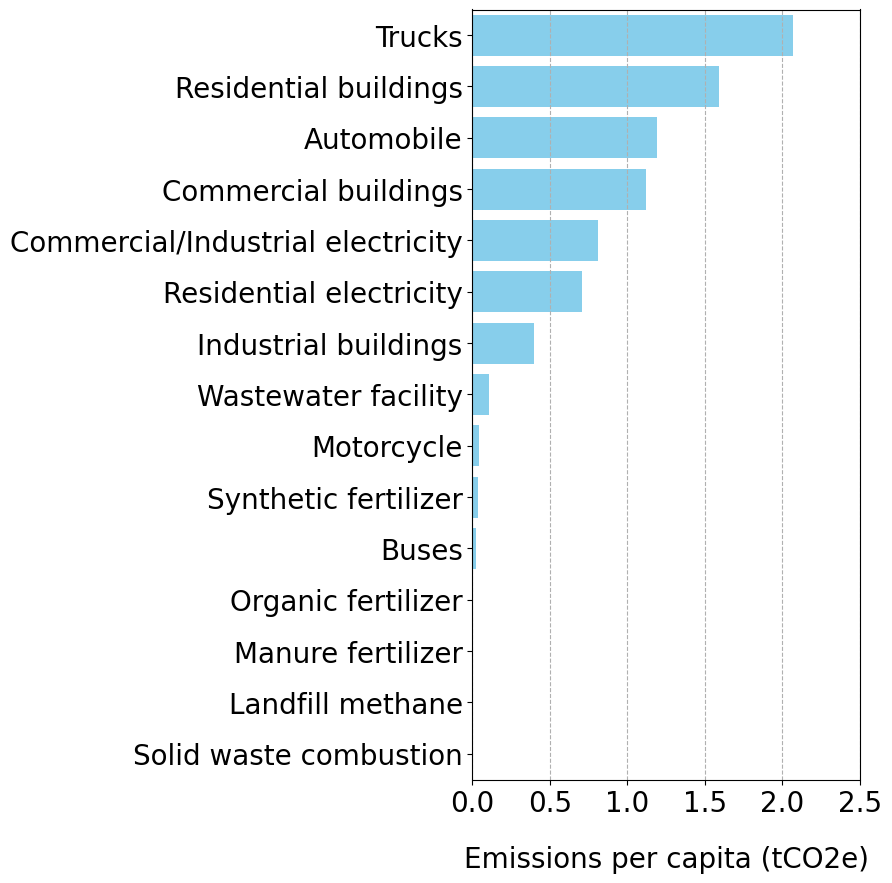

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_new_haven_sorted is your DataFrame
df_new_haven_sorted = df_new_haven.sort_values(by='Emissions per capita (MTCO2e)', ascending=True)

categories = df_new_haven_sorted['Subsector']
values = df_new_haven_sorted['Emissions per capita (MTCO2e)']

fig, ax = plt.subplots(figsize=(5, 10))

# Calculate the width of the bars based on the 'Emissions per capita (MTCO2e)' values
bar_widths = 0.8

# Create the bar plot with sorted values and categories
ax.barh(categories, values, height=bar_widths, color='skyblue')
ax.set_xlabel('Emissions per capita (tCO2e)', color='black', fontsize=20)

ax.tick_params(axis='x', labelcolor='black', labelsize=20)
ax.grid(axis='x', linestyle='--', alpha=1)
ax.tick_params(axis='x', labelcolor='black', labelsize=20)
ax.xaxis.labelpad = 20
ax.set_xticks(np.arange(0, 3, 0.5)) 
ax.tick_params(axis='y', labelcolor='black', labelsize=20)

# Set the y-axis limit to remove the white space
ax.set_ylim(-0.5, len(categories)-0.5)



# Show the plot
plt.savefig('../../../figures/Report-images/newhaven-emissions-capita.png', dpi=600, bbox_inches='tight')
plt.show()


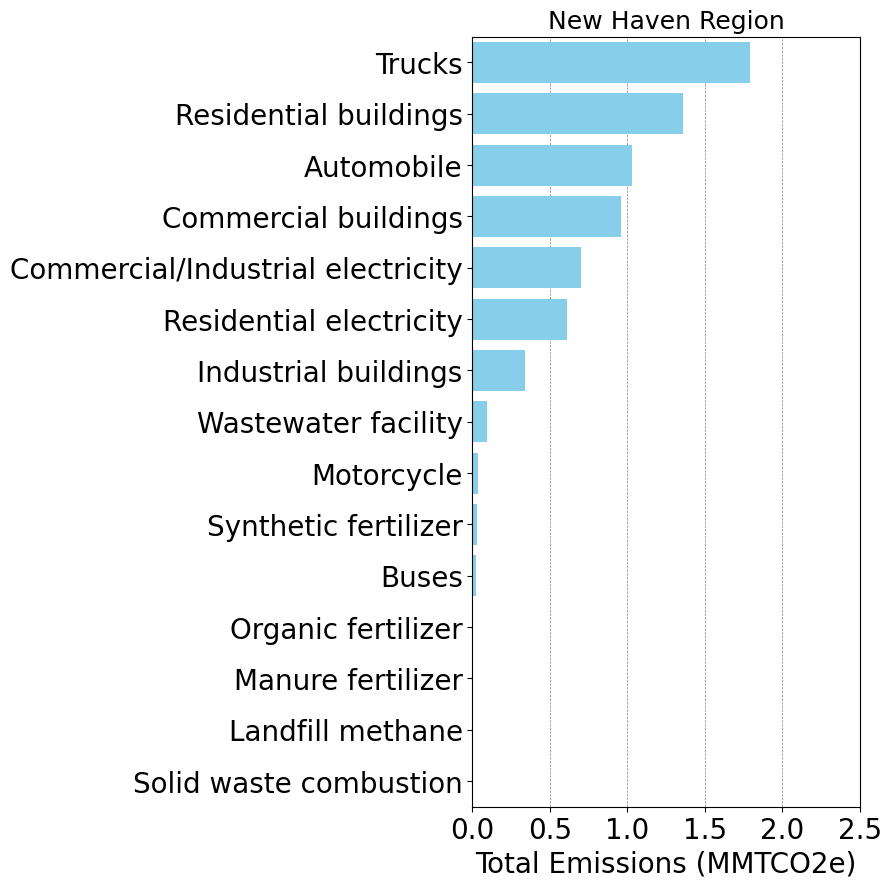

In [33]:
# Assuming df_new_haven_sorted is your DataFrame
df_new_haven_sorted['Total Emissions (MMTCO2e)'] = pd.to_numeric(df_new_haven_sorted['Total Emissions (MMTCO2e)'], errors='coerce')
df_new_haven_sorted = df_new_haven.sort_values(by='Total Emissions (MMTCO2e)', ascending=True)

categories = df_new_haven_sorted['Subsector']  # Reverse the order
values = df_new_haven_sorted['Total Emissions (MMTCO2e)']  # Reverse the order

fig, ax = plt.subplots(figsize=(5, 10))

# Calculate the width of the bars based on the 'Emissions per capita (MTCO2e)' values
bar_widths = 0.8

# Create the bar plot
bars = ax.barh(categories, values, height=bar_widths, color='skyblue')
ax.set_xlabel('Total Emissions (MMTCO2e)', color='black', fontsize=20)
ax.tick_params(axis='x', labelcolor='black', labelsize=20)
ax.set_xticks(np.arange(0, 3, 0.5)) 
ax.tick_params(axis='y', labelcolor='black', labelsize=20)

# Set the y-axis limit to remove the white space
ax.set_ylim(-0.5, len(categories)-0.5)

ax.set_title('New Haven Region', fontsize=18)

# Draw vertical grid lines manually behind the bars
for x in ax.get_xticks():
    ax.axvline(x, color='gray', linestyle='--', linewidth=0.5, zorder=0)

# Save the plot
plt.savefig('../../../figures/Report-images/newh-emissions-total.png', dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


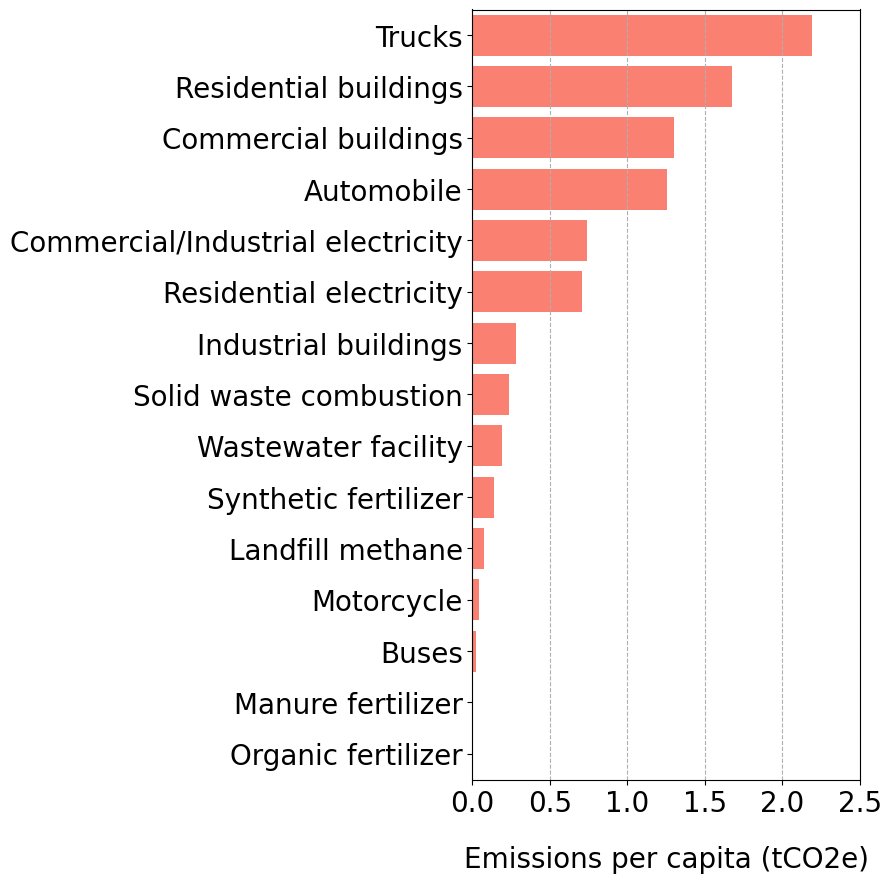

In [35]:
df_hartford_sorted = df_hartford.sort_values(by='Emissions per capita (MTCO2e)', ascending=True)

categories = df_hartford_sorted['Subsector']
values = df_hartford_sorted['Emissions per capita (MTCO2e)']


fig, ax = plt.subplots(figsize=(5, 10))

# Calculate the width of the bars based on the 'Total Emissions (MMTCO2e)' values
bar_widths = 0.8

# Create the first bar plot
ax.barh(categories, values, height=bar_widths, color='salmon')
ax.set_xlabel('Emissions per capita (tCO2e)', color='black',fontsize=20)
ax.tick_params(axis='x', labelcolor='black',labelsize=20)
ax.grid(axis='x', linestyle='--', alpha=1)
ax.tick_params(axis='x', labelcolor='black',labelsize=20)
ax.xaxis.labelpad = 20  # You can adjust the value as needed
ax.set_xticks(np.arange(0, 3, 0.5)) 
# Set the x-tick label size
ax.tick_params(axis='y', labelcolor='black', labelsize=20)  # Adjust the labelsize as needed

# Set the y-axis limit to remove the white space
ax.set_ylim(-0.5, len(categories)-0.5)


# Show the plot
plt.savefig('../../../figures/Report-images/Hartford-emissions-per-capita.png', dpi=600, bbox_inches='tight')

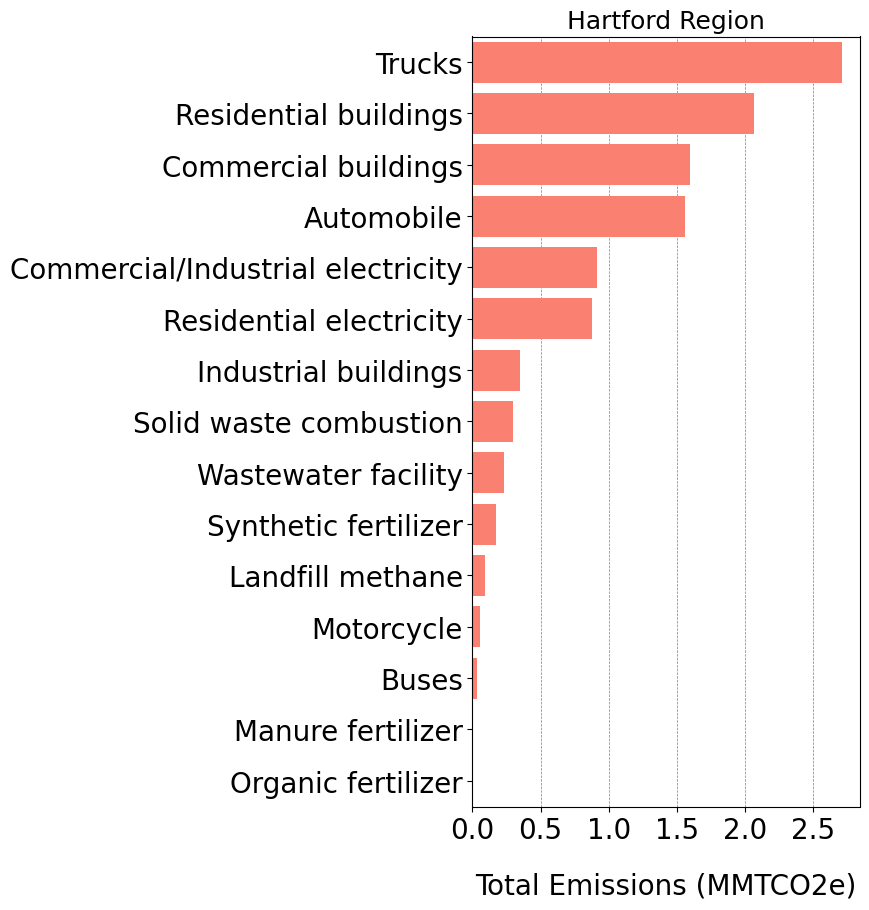

In [36]:
df_hartford_sorted['Total Emissions (MMTCO2e)'] = pd.to_numeric(df_hartford_sorted['Total Emissions (MMTCO2e)'], errors='coerce')

# Assuming df_new_haven_sorted is your DataFrame
df_hartford_sorted = df_hartford.sort_values(by='Total Emissions (MMTCO2e)', ascending=True)

categories = df_hartford_sorted['Subsector']  # Reverse the order
values = df_hartford_sorted['Total Emissions (MMTCO2e)']  # Reverse the order

fig, ax = plt.subplots(figsize=(5, 10))

# Calculate the width of the bars based on the 'Emissions per capita (MTCO2e)' values
bar_widths = 0.8

# Create the bar plot
ax.barh(categories, values, height=bar_widths, color='salmon')
ax.set_xlabel('Total Emissions (MMTCO2e)', color='black', fontsize=20)
ax.tick_params(axis='x', labelcolor='black', labelsize=20)
#ax.grid(axis='x', linestyle='--', alpha=1)
ax.tick_params(axis='x', labelcolor='black', labelsize=20)
ax.xaxis.labelpad = 20
ax.set_xticks(np.arange(0, 3, 0.5)) 
ax.tick_params(axis='y', labelcolor='black', labelsize=20)

# Set the y-axis limit to remove the white space
ax.set_ylim(-0.5, len(categories)-0.5)

ax.set_title('Hartford Region', fontsize=18)

# Draw vertical grid lines manually behind the bars
for x in ax.get_xticks():
    ax.axvline(x, color='gray', linestyle='--', linewidth=0.5, zorder=0)



# Show the plot
plt.savefig('../../../figures/Report-images/hartford-emissions-total.png', dpi=600, bbox_inches='tight')

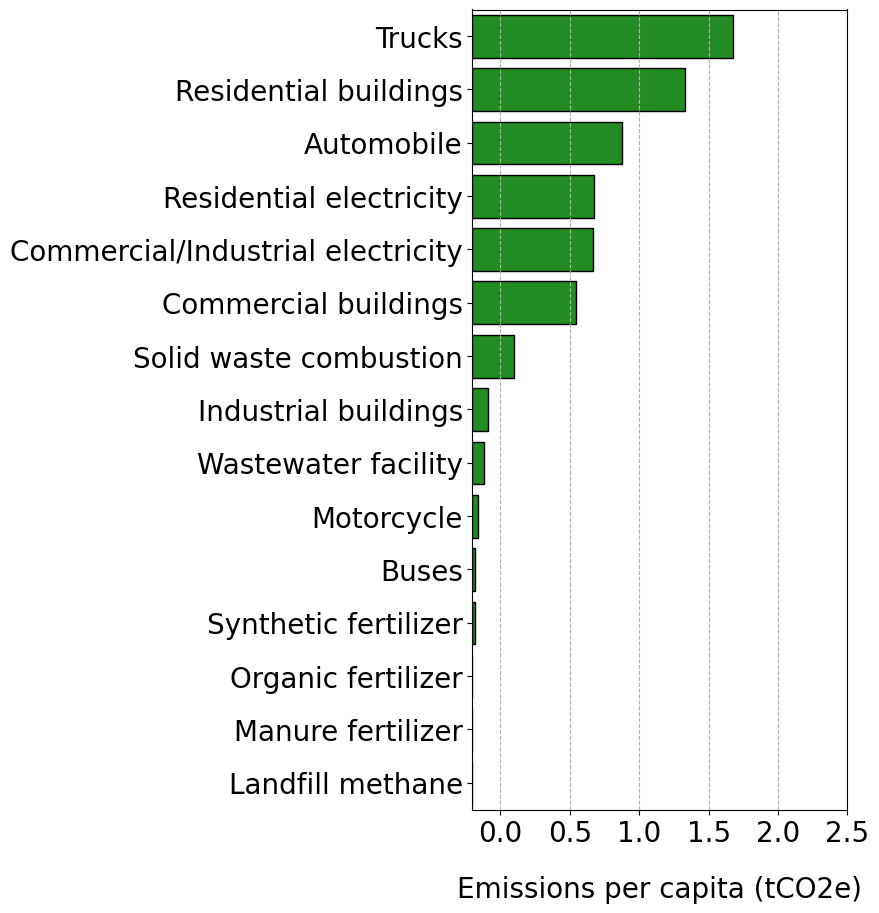

In [37]:
df_bridgeport_sorted = df_bridgeport.sort_values(by='Emissions per capita (MTCO2e)', ascending=True)

categories = df_bridgeport_sorted['Subsector']
values = df_bridgeport_sorted['Emissions per capita (MTCO2e)']


fig, ax = plt.subplots(figsize=(5, 10))

# Calculate the width of the bars based on the 'Total Emissions (MMTCO2e)' values
bar_widths = 0.8

# Create the first bar plot
ax.barh(categories, values, height=bar_widths, color='forestgreen', edgecolor='black', left=-0.2)
ax.set_xlabel('Emissions per capita (tCO2e)', color='black',fontsize=20)
ax.tick_params(axis='x', labelcolor='black',labelsize=20)
ax.grid(axis='x', linestyle='--', alpha=1)
ax.tick_params(axis='x', labelcolor='black',labelsize=20)
ax.xaxis.labelpad = 20  # You can adjust the value as needed
ax.set_xticks(np.arange(0, 3, 0.5)) 
ax.tick_params(axis='y', labelcolor='black', labelsize=20)  # Adjust the labelsize as needed

# Set the y-axis limit to remove the white space
ax.set_ylim(-0.5, len(categories)-0.5)


# Manually adjust subplots and margins to reduce white space
plt.subplots_adjust(left=0.2, right=0.95, top=0.9, bottom=0.1)
# Show the plot
plt.savefig('../../../figures/Report-images/bridgeport-emissions-per-capita.png', dpi=600, bbox_inches='tight')

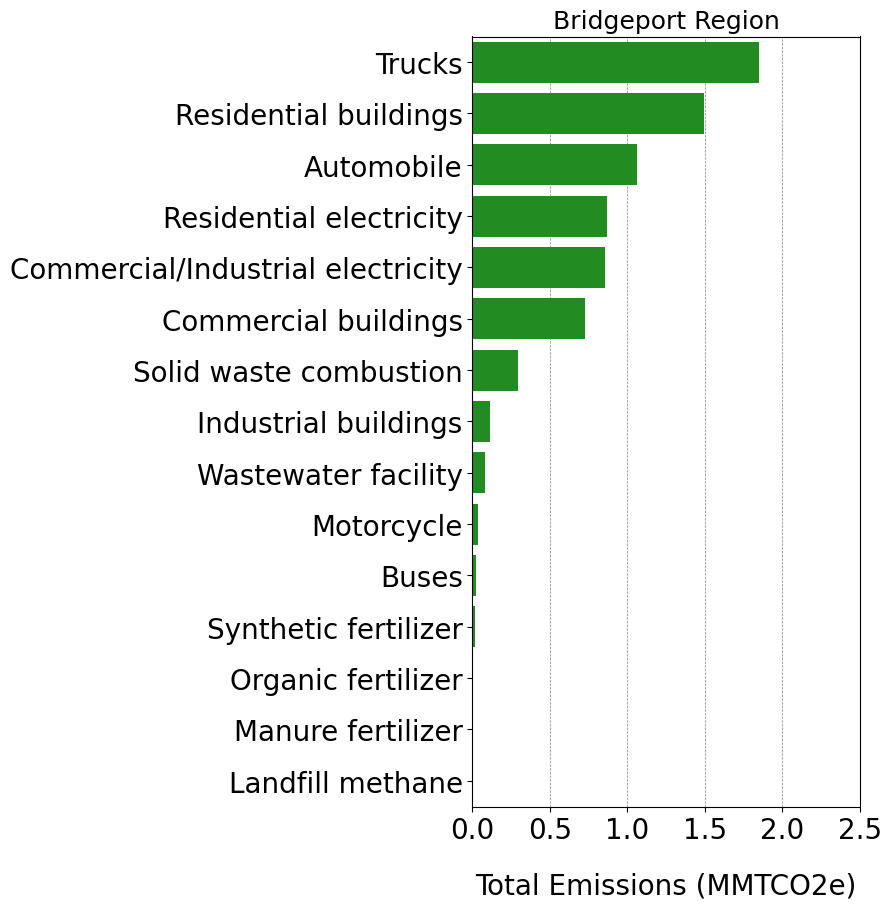

In [38]:
df_bridgeport_sorted['Total Emissions (MMTCO2e)'] = pd.to_numeric(df_bridgeport_sorted['Total Emissions (MMTCO2e)'], errors='coerce')

# Assuming df_new_haven_sorted is your DataFrame
df_bridgeport_sorted = df_bridgeport.sort_values(by='Total Emissions (MMTCO2e)', ascending=True)

categories = df_bridgeport_sorted['Subsector']  # Reverse the order
values = df_bridgeport_sorted['Total Emissions (MMTCO2e)']  # Reverse the order

fig, ax = plt.subplots(figsize=(5, 10))

# Calculate the width of the bars based on the 'Emissions per capita (MTCO2e)' values
bar_widths = 0.8

# Create the bar plot
ax.barh(categories, values, height=bar_widths, color='forestgreen')
ax.set_xlabel('Total Emissions (MMTCO2e)', color='black', fontsize=20)
ax.tick_params(axis='x', labelcolor='black', labelsize=20)
#ax.grid(axis='x', linestyle='--', alpha=1)
ax.tick_params(axis='x', labelcolor='black', labelsize=20)
ax.xaxis.labelpad = 20
ax.set_xticks(np.arange(0, 3, 0.5)) 
ax.tick_params(axis='y', labelcolor='black', labelsize=20)

# Set the y-axis limit to remove the white space
ax.set_ylim(-0.5, len(categories)-0.5)

ax.set_title('Bridgeport Region', fontsize=18)

# Draw vertical grid lines manually behind the bars
for x in ax.get_xticks():
    ax.axvline(x, color='gray', linestyle='--', linewidth=0.5, zorder=0)



# Show the plot
plt.savefig('../../../figures/Report-images/bridgeport-emissions-total.png', dpi=600, bbox_inches='tight')

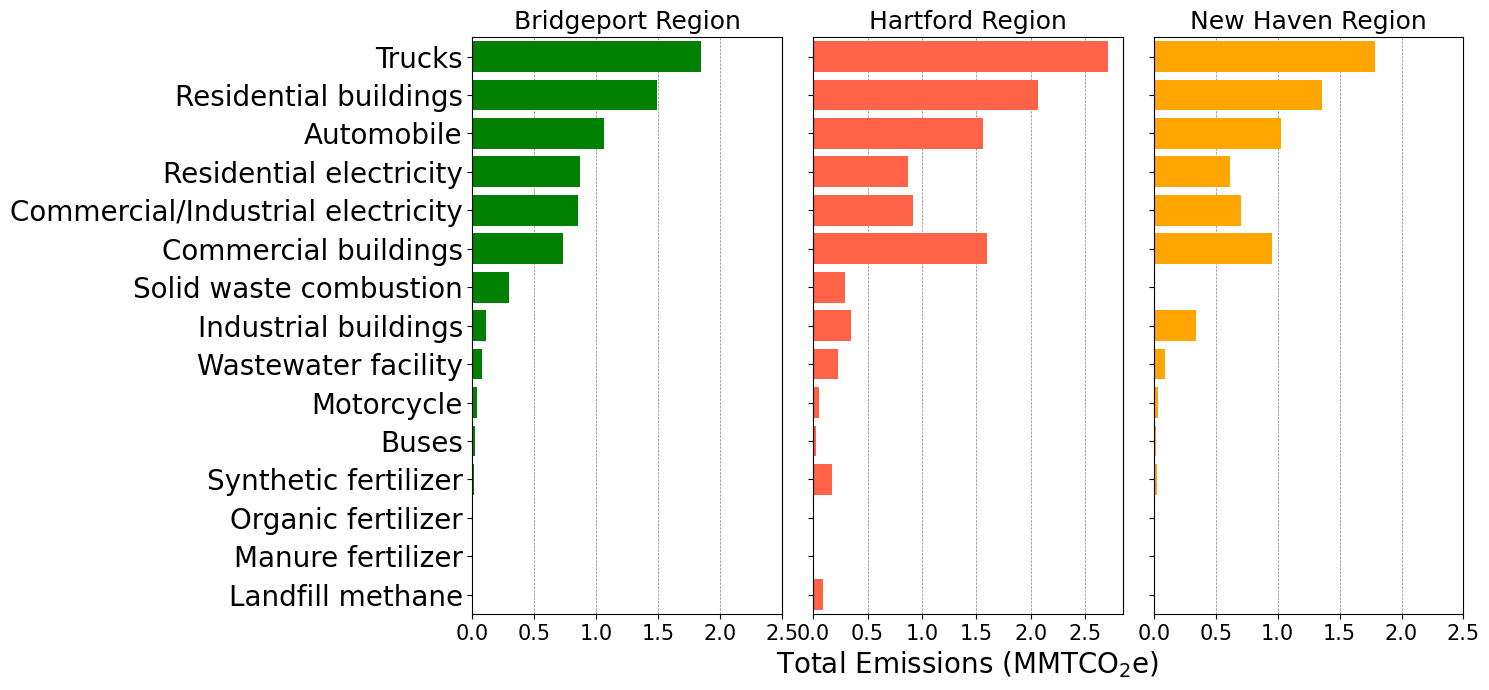

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df_new_haven_sorted, df_hartford_sorted, and df_bridgeport_sorted are your DataFrames
def create_barh_plot(ax, df, region_name, color, show_xlabel=False):
    df['Total Emissions (MMTCO2e)'] = pd.to_numeric(df['Total Emissions (MMTCO2e)'], errors='coerce')
    df = df.sort_values(by='Total Emissions (MMTCO2e)', ascending=True)

    categories = df['Subsector']
    values = df['Total Emissions (MMTCO2e)']

    bar_widths = 0.8

    bars = ax.barh(categories, values, height=bar_widths, color=color)
    if show_xlabel:
        ax.set_xlabel('Total Emissions (MMTCO$_2$e)', color='black', fontsize=20)
    ax.tick_params(axis='x', labelcolor='black', labelsize=15)
    ax.set_xticks(np.arange(0, 3, 0.5))
    ax.tick_params(axis='y', labelcolor='black', labelsize=20)
    ax.set_ylim(-0.5, len(categories) - 0.5)
    ax.set_title(region_name, fontsize=18)

    for x in ax.get_xticks():
        ax.axvline(x, color='gray', linestyle='--', linewidth=0.5, zorder=0)

# Create a figure with 3 subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), sharey=True)

# Assuming df_new_haven_sorted, df_hartford_sorted, and df_bridgeport_sorted are your DataFrames
create_barh_plot(axs[0], df_bridgeport_sorted, 'Bridgeport Region', 'green', show_xlabel=False)
create_barh_plot(axs[1], df_hartford_sorted, 'Hartford Region', 'tomato', show_xlabel=True)
create_barh_plot(axs[2], df_new_haven_sorted, 'New Haven Region', 'orange', show_xlabel=False)

# Set a common y-label
#axs[0].set_ylabel('Subsector', fontsize=20)

# Adjust layout to ensure y-labels are not cut off
plt.tight_layout()
plt.subplots_adjust(wspace=0.1)  # Adjust the width between plots

# Save the combined plot
plt.savefig('../../../figures/Report-images/emissions-total-combined.png', dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


<span style="font-family: verdana; color: green; font-size: 20px;font-weight: bold;">Step four: Table summary for sector emissions</span>

In [40]:
mobile = pd.read_csv('../../../visualization data/Mobile-combustion-emissions.csv')
mobile = mobile['GHG Emissions(MMTCO2e)']
electric = pd.read_csv('../../../visualization data/2021-Electricity-consumption-emissions.csv')
electric = electric['Total Emissions (MMTCO2e)']
residential_breakdowm = pd.read_csv('../../../visualization data/residential-emissions-breakdown-fuel.csv')
residential_oil = residential_breakdowm.iloc[2,1:][::-1].reset_index(drop=True).astype(float)
residential_propane = residential_breakdowm.iloc[1,1:][::-1].reset_index(drop=True).astype(float)
residential_natural = residential_breakdowm.iloc[0,1:][::-1].reset_index(drop=True).astype(float)
residential = residential_oil+residential_propane+residential_natural
commercial = summary.loc[28:30,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
industrial = summary.loc[31:33,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
stationary = residential_oil+residential_propane+residential_natural+commercial+industrial
solid_waste_combustion = summary.loc[19:21,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
solid_waste_landfills = summary.loc[22:24,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
solid_waste = solid_waste_combustion+solid_waste_landfills
agriculture = pd.read_csv('../../../visualization data/agriculture-emissions.csv')
agriculture = agriculture['GHG Emissions (MMTCO2e)']
wastewater = summary.loc[43:45,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
forest = pd.read_csv('../../../visualization data/land-cover-emissions.csv')
forest = forest['Total carbon sequestration (MMTCO2e)']*(-1)

In [43]:
#create a summary table for all the emissions
# Creating a sample DataFrame
data = {
    'MSA': ['New Haven-Milford', 'Hartford-east Hartford-Middletown', 'Bridgeport-Stamford-Norwalk'],
    'Mobile Combustion': mobile,
    'Electric Power Consumption': electric,
    'Solid Waste': solid_waste,
    'Residential Building': residential,
    'Commercial Building': commercial,
    'Industrial Facility': industrial,
    'Agriculture & land management': agriculture,
    'Wastewater treatment': wastewater,
    'Urban forestry': forest,
}

df = pd.DataFrame(data)

# Display the created DataFrame

df.set_index('MSA', inplace=True)
df_transposed = df.transpose()
df_transposed

# Sum the entire column
column_sums = df_transposed.sum()

# Add a new row at the bottom with column-wise sums
df_transposed.loc['Total'] = column_sums

df_transposed.index = [index + " (MMTCO2e)" for index in df_transposed.index]
df_transposed.to_csv('../../../results/sectors/sector-emissions.csv')

In [42]:
df_transposed

MSA,New Haven-Milford,Hartford-east Hartford-Middletown,Bridgeport-Stamford-Norwalk
Mobile Combustion (MMTCO2e),2.875389,4.355344,2.968949
Electric Power Consumption (MMTCO2e),1.314940,1.790219,1.719647
Solid Waste (MMTCO2e),0.000000,0.384963,0.296673
Residential Building (MMTCO2e),1.361021,2.064354,1.492142
Commercial Building (MMTCO2e),0.955882,1.600473,0.727635
Industrial Facility (MMTCO2e),0.339402,0.347809,0.109909
Agriculture & land management (MMTCO2e),0.029241,0.170435,0.014407
Wastewater treatment (MMTCO2e),0.092857,0.232347,0.079003
Urban forestry (MMTCO2e),-0.627891,-1.983747,-0.737232
Total (MMTCO2e),6.340842,8.962197,6.671133
